# Data Exploration: Data Visualization $\,\, \tiny\text{Analysis Lab | High-Tech Stock Market}$

<img src="banner lab 1.jpg" align=left>

<br>
This business case analysis is presented as a Jupyter notebook using R analysis software.  It assumes familiarity with Primer I: Data Manipulation and Primer II: Data Description, but no other familiarity with Jupyter or R, and so goes into considerable detail about R's structure and functionality as applied to this kind of analysis.

<br>
### About the Business Situation & Data
___

We continue our analysis of high-tech stock returns.

<br>
### Apparatus
___

In [85]:
# Load some required functions
library(rJava,      verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(xlsxjars,   verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(xlsx,       verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE) # Also, ensure Java version (32-bit or 64-bit) matches R kernel
library(ggplot2,    verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(gridExtra,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE) 
library(GGally,     verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(reshape2,   verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(IRdisplay,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(base64enc,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)

# Define some useful functions
video = function(filename, mimetype) { d = base64encode(filename, 'raw'); display_html(paste0('<video controls src="data:', mimetype, ';base64,', d, '">')) }  # Not supported in Chrome browser
youtube = function(id, width=500, height=500) { display_html(paste0('<iframe src =https://www.youtube.com/embed/', id, ' width=', width, ', height=', height, ' allowfullscreen></iframe> ' )) }

# Set some visualization constants
PALETTE = c("dodgerblue2", "brown3", "chartreuse4", "darkgoldenrod", "mediumorchid3", "dodgerblue4")
theme.no_legend = theme(legend.position="none")

# Set some visualization formatting defaults
update_geom_defaults("point", list(size=0.25, colour=PALETTE[3]))
update_geom_defaults("line", list(size=0.15))
update_geom_defaults("bar", list(colour=NA, fill=PALETTE[3]))
theme_update(plot.title=element_text(size=10, hjust=0.5), plot.subtitle=element_text(size=8, face="italic", hjust=0.5), axis.title=element_text(size=7), axis.text=element_text(size=7), strip.text=element_text(size=7), strip.text.y=element_text(angle=90), legend.title=element_blank(), legend.text=element_text(size=7))

We use the `library` function (provided by the R system) multiple times to load specific libraries of functions.  The functions result in providing us all of the many functions contained in the libraries, which we can use later.

We define 2 additional useful functions not included in the libraries: `video` and `youtube`.  We can use them later.

We use the `update_geom_defaults` and `theme_update` functions to set some visualization formatting defaults that will stay in effect.

<br>
### Data Retrieval
___

The dataset that you will use for this analysis is called ** $\,$ `dataset tech stocks.xlsx` $\,$ **. 

** (a) Retrieve the dataset. **

In [86]:
data = read.xlsx("../DATASETS/DATASET High-Tech Stocks.xlsx", sheetIndex=1, header=TRUE)
dim(data)
colnames(data)

[1] 261  12

[1] "Date"                         "Apple.Return"                
 [3] "Dell.Return"                  "IBM.Return"                  
 [5] "Microsoft.Return"             "Value.weighted.Market.Return"
 [7] "SP.500.Return"                "Price..Dell"                 
 [9] "Price..Apple"                 "Price..IBM"                  
[11] "Price..Microsoft"             "Calendar.Date"

To retrieve the dataset in file `dataset tech stocks.xlsx`, we use the `read.xlsx` function.  To confirm that the dataset has been retrieved and assigned, we use the `dim` and `colname` functions.

<br>
### Data Formatting
___

** (a) Calculate the mean of the standard deviations for the 4 tech returns, and compare it to the standard deviation for the S&P 500 returns. **

In [87]:
cat(sprintf("Mean standard deviation for 4 tech returns = $%0.2f\n", mean(c(sd(data[,2]), sd(data[,3]), sd(data[,4]), sd(data[,5])))))
cat(sprintf("Standard deviation for S&P 500 return = $%0.2f\n", sd(data[, 7])))

Mean standard deviation for 4 tech returns = $0.12
Standard deviation for S&P 500 return = $0.04


To compute the mean of the 4 tech returns' standard deviations, we first use <code>[&#8230;]</code> notation to reference columns 2, 3, 4, and 5.  Then we use the `sd` function, once per column, to compute the standard deviation for each column.  Then we use the `c` function to combine these 4 standard deviation values into a single vector.  Then we use the `mean` function to compute the mean of the vector's values.  Taken all together, it looks like this:<br>
`mean(c(sd(data[,2]), sd(data[,3]), sd(data[,4]), sd(data[,5])))`

To format the upcoming presentation of the resulting value, we use the `sprintf` function.  The 1st parameter is a string that specifies the format.  The 2nd parameter is the value to be substituted in according to the format specification, in this case the computation of the mean of the 4 tech returns' standard deviations.  Taken all together, it looks like this:<br>
`sprintf("Mean standard deviation for 4 tech returns = $%0.2f\n", mean(c(sd(data[,2]), sd(data[,3]), sd(data[,4]), sd(data[,5]))))`

To send the presentation of the resulting value to output, we use the `cat` function.  Taken all together, it looks like this:<br>
`cat(sprintf("Mean standard deviation for 4 tech returns = $%0.2f\n", mean(c(sd(data[,2]), sd(data[,3]), sd(data[,4]), sd(data[,5])))))`

To compute, format, and send to output the S&P 500 returns' standard deviation, we use the same approach.  Taken all together, it looks like this:<br>
`cat(sprintf("Standard deviation for S&P 500 return = $%0.2f\n", sd(data[, 7])))`

Note, the 2nd resulting value is output on its own line.  This is because the 1st resulting value has been formatted to force subsequent output onto a new line - that's indicated by `\n` in the format specification.

_ About format specification:<br>
A format specification is described by a string.  Some patterns in the string are meant to be substituted with values.  One such useful pattern is `%0.2f`. In this pattern, `%` means start the substitution, `0` means no leading zeros, `.2` means 2 decimal places, and `f` means numeric.  `\n` means subsequent output should move to the next line. _

<br>
### Data Visualization
___

** (a) Show a scatterplot of Apple returns vs time. **

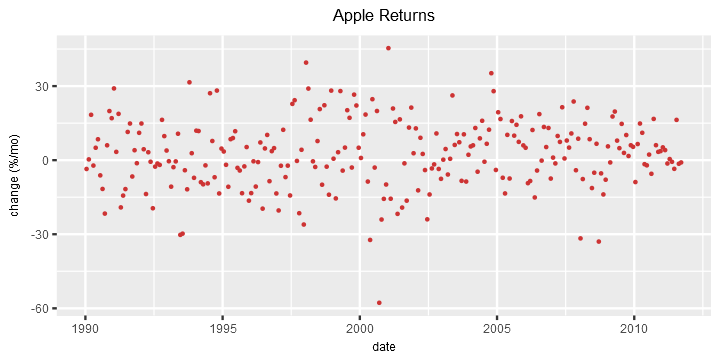

In [88]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data) +
geom_point(aes(x=Date, y=Apple.Return*100), color=PALETTE[2]) +
ggtitle("Apple Returns") + xlab("date") + ylab("change (%/mo)")

To size the upcoming visualization, we use the `options` function.  The `repr.plot.width` parameter sets the width.  The `repr.plot.height` parameter sets the height.

To visualize Apple returns as a scatterplot, we use `ggplot` and related functions.  These functions initialize the visualization and create additional visualization layers.  We use the `+` operator to connect the initialized visualization to other layers.  Note, the `+` operator used in this context does not mean numerical additional.

`ggplot` initializes the visualization.  The parameter is a table that includes the columns of values to be visualized, in this case `data`.

`geom_point` creates a layer of points.  The 1st parameter indicates the points' locations.  We use the `aes` function to specify the points' locations, in this case `data`'s `Date` column of values taken as the points' x coordinates, and `data`'s `Apple.Return` column of values, each multiplied by 100, taken as the points' y coordinates.  The `color` parameter is the points' color.  Note, the column names are described not as strings, and so not enclosed within `"` `"`.  Note also, the R system can recognize many different strings as color names.

`ggtitle` creates a layer with a title.  The parameter is the title text.

`xlab` creates a layer with an x-axis label.  The parameter is the x-axis label text.

`ylab` creates a layer with a y-axis label.  The parameter is the y-axis label text.

<br>
** (b) Show a lineplot of Apple returns vs time. **

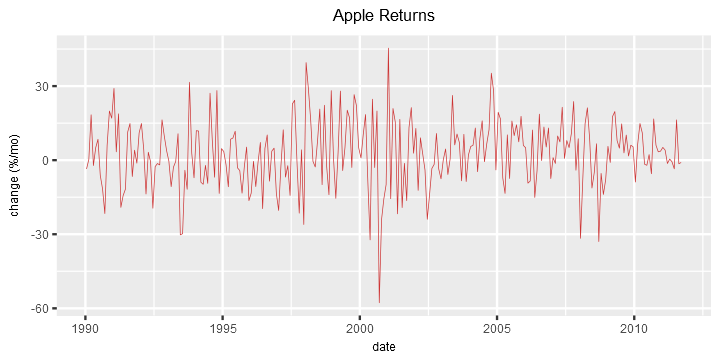

In [89]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data) +
geom_line(aes(x=Date, y=Apple.Return*100), color=PALETTE[2]) +
ggtitle("Apple Returns") + xlab("date") + ylab("change (%/mo)")

To visualize Apple returns as a lineplot, we use the `geom_line` function instead of the `geom_point` function.

<br>
** (c) Show a histogram of Apple returns. **

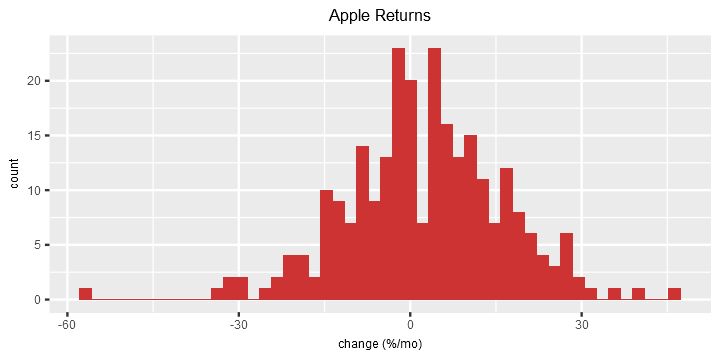

In [90]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data) +
geom_histogram(aes(x=Apple.Return*100), bins=50, fill=PALETTE[2]) +
ggtitle("Apple Returns") + xlab("change (%/mo)")

To visualize Apple returns as a histogram, we use the `geom_histogram` function instead of the `geom_points` or `geom_ line` function.  The 1st parameter is the histogram values.  We use the `aes` function to specify the histogram values, in this case `data`'s `Apple.Returns` column of values, each multiplied by 100.  The `bins` parameter is the histogram's number of bins.  The `color` parameter is the bars' edge color.  The `fill` parameter is the bars' interior color.  Note, no y-axis label need be specified - it defauts to "count".

<br>
** (d) Show the correlation between Apple returns and Dell returns as a scatterplot. **

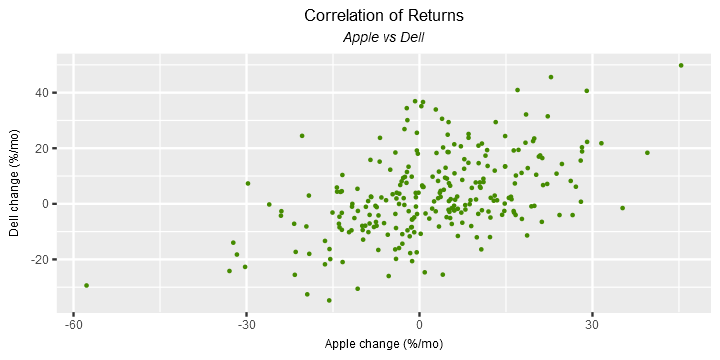

In [91]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data) +
geom_point(aes(x=Apple.Return*100, y=Dell.Return*100)) +
ggtitle("Correlation of Returns", "Apple vs Dell") + xlab("Apple change (%/mo)") + ylab("Dell change (%/mo)")

To visualize the correlation between Apple returns and Dell returns as a scatterplot, we use the `geom_point` function, but reference the `Apple.Returns` and `Dell.Returns` columns instead of the `Date` and `Apple.Returns` columns.

Note, the `ggtitle` function can take 2 parameters.  If present, the 2nd parameter is the subtitle text.

<br>
** (e) Compare Apple returns to S&P 500 returns as a lineplot vs time. **

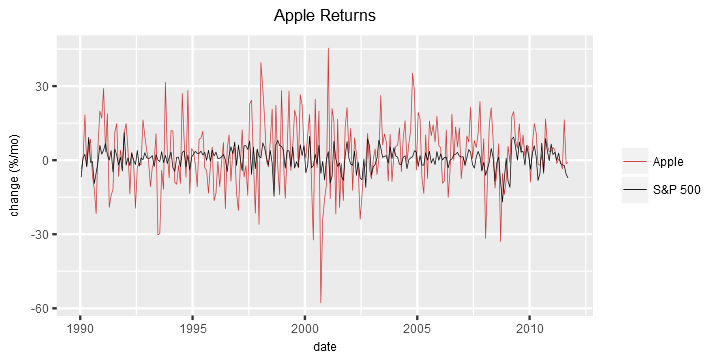

In [92]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data) +
geom_line(aes(x=Date, y=Apple.Return*100, color="Apple")) +
geom_line(aes(x=Date, y=SP.500.Return*100, color="S&P 500")) +
scale_color_manual(values=c("Apple"=PALETTE[2], "S&P 500"="black")) +
ggtitle("Apple Returns") + xlab("date") + ylab("change (%/mo)")

To visualize Apple returns and Dell returns as a lineplot, we use the `geom_line` function twice.

The 1st `geom_line` creates a layer with a line of connected points.  The 1st parameter indicates the points' locations and their legend label.  We use the `aes` function to specify the points' locations and their legend label.  Note, the `color` parameter of the `aes` function is the legend label, not to be confused with the `color` parameter of the `geom_line` function that we used earlier.

The 2nd `geom_line` creates another layer with a line of connected points.

`scale_color_manual` creates a layer with a map of which legend lables go with which colors.  The `values` parameter is a vector of color names, each element named by its associated legend label.

Because (in the `geom_line` functions) `aes` functions have been used with `color` parameters, the visualization will automatically include a legend.

_ About naming vector elements:<br>
The `c` function is used to create a vector of values, e.g., `x = c("brown2", "black")` results in a vector of 2 elements, the 1st element value is "brown2", the 2nd element value is "black".  Vector elements can be named with `=` notation, e.g., `x = c("Apple"="brown2", "S&P 500"="black")` results in a vector of 2 elements, the 1st element is named "Apple", the 2nd element is named "S&P 500".  Then, specific elements can be referenced by name, e.g., `x["Apple"]` has the value "brown2", and `x["S&P 500"]` has the value "black". _

<br>
** (f) Compare the 4 tech returns to S&P 500 returns as a lineplot vs time. **

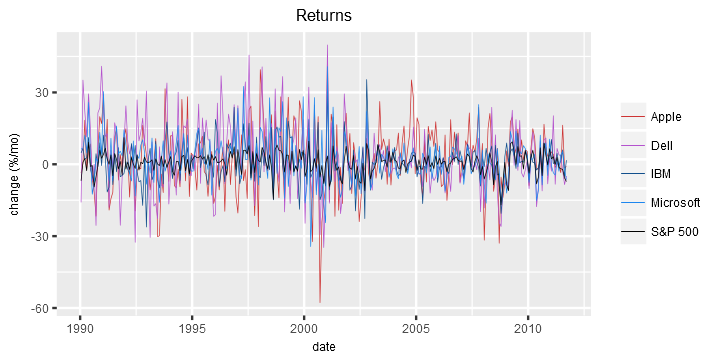

In [93]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data) +
geom_line(aes(x=Date, y=Apple.Return*100, color="Apple")) +
geom_line(aes(x=Date, y=Dell.Return*100, color="Dell")) +
geom_line(aes(x=Date, y=IBM.Return*100, color="IBM")) +
geom_line(aes(x=Date, y=Microsoft.Return*100, color="Microsoft")) +
geom_line(aes(x=Date, y=SP.500.Return*100, color="S&P 500")) +
scale_color_manual(values=c("Apple"=PALETTE[2], "Dell"=PALETTE[5], "IBM"=PALETTE[6], "Microsoft"=PALETTE[1], "S&P 500"="black")) +
ggtitle("Returns") + xlab("date") + ylab("change (%/mo)")

To visualize all returns as a lineplot, we use the `geom_line` function once for each column of returns.<br>

<br>
** (g) Compare the 4 tech returns to S&P 500 returns as a lineplot vs time - alternative "long data" method. **

In [94]:
data.long = melt(data[, c(1:5,7)], id=c("Date"))

head(data.long)
tail(data.long)

Date     variable     value    
1 1990.042 Apple.Return -0.035461
2 1990.125 Apple.Return  0.003235
3 1990.208 Apple.Return  0.183824
4 1990.292 Apple.Return -0.021739
5 1990.375 Apple.Return  0.050413
6 1990.458 Apple.Return  0.084848

Date     variable      value    
1300 2011.292 SP.500.Return  0.028495
1301 2011.375 SP.500.Return -0.013501
1302 2011.458 SP.500.Return -0.018258
1303 2011.542 SP.500.Return -0.021474
1304 2011.625 SP.500.Return -0.056791
1305 2011.708 SP.500.Return -0.071762

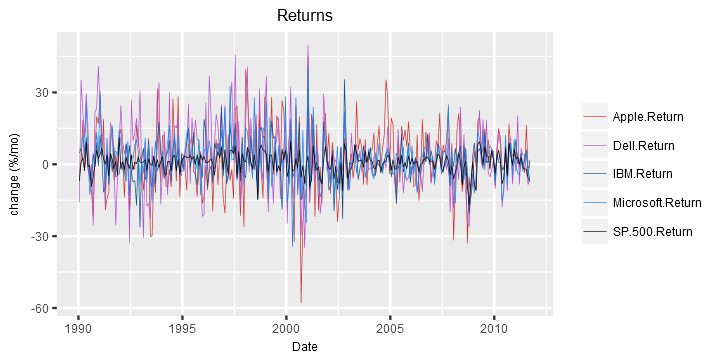

In [95]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data.long) +
geom_line(aes(x=Date, y=value*100, color=variable)) +
scale_color_manual(values=c(PALETTE[c(2,5,6,1)], "black")) +
ggtitle("Returns") + xlab("Date") + ylab("change (%/mo)")

As an alternative way to visualize all returns as a lineplot, we convert (a slice of) `data` to "long" form, and then use the `geom_line` function just once.

`geom_line` creates a layer with a line of points.  The parameter indicates the points' locations and their legend labels.  We use the `aes` function to specify the points' locations and their legend labels.  Note, the `color` parameter of the `aes` function takes `data.long`'s `variable` column of values, which are the original returns column names, which also serve as the legend labels.  The legend lables disambiguate which points go with which lines. 

<br>
** (h) Compare the 4 tech returns to S&P 500 returns as multiple side-by-side lineplots vs time. **

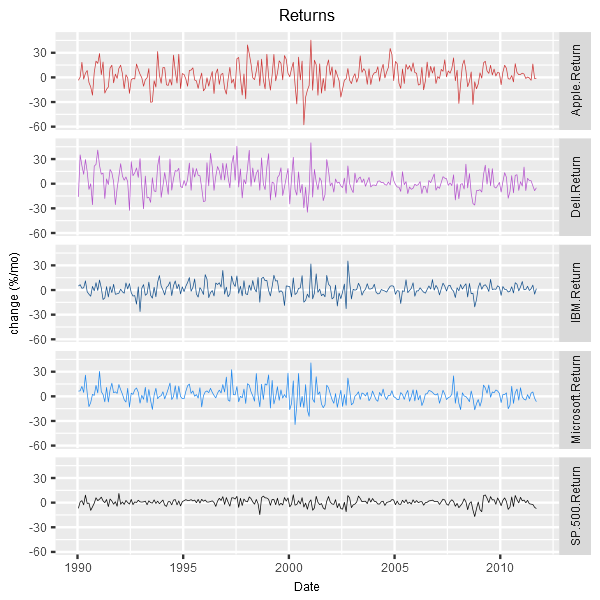

In [96]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(data.long) +
facet_wrap("variable", strip.position="right", nrow=5) +
geom_line(aes(x=Date, y=value*100, color=variable)) +
scale_color_manual(values=c(PALETTE[c(2,5,6,1)], "black")) +
ggtitle("Returns") + xlab("Date") + ylab("change (%/mo)") + theme.no_legend

To visualize all returns as side-by-side lineplots, we again convert (a slice of) `data` to "long" form, and then use the `facet_wrap` function to separate out individual lineplots according to legend label.

`facet_wrap` creates a layer with instructions to separate out individual lineplots according to legend label.  The 1st parameter is the name of the column with the legend label values, in this case `"variable"`.  It is described as a string, so it is enclosed within <code>"&#8230;"</code>.   The `strip.position` parameter is the relative location of the legend labels in the visualization layout, in this case to the right of individual lineplots.  The `nrow` parameter is the number of rows in the visualization layout.

`theme` creates a layer of visualization format specifications.  The `legend.position` parameter is the relative location of the legend in the visualization layout, in this case `"none"`, which effectively prevents the legend from expicitly appearing in the visualization.

<br>
** (i) Show the correlations between the 4 tech returns as multiple side-by-side scatterplots. **

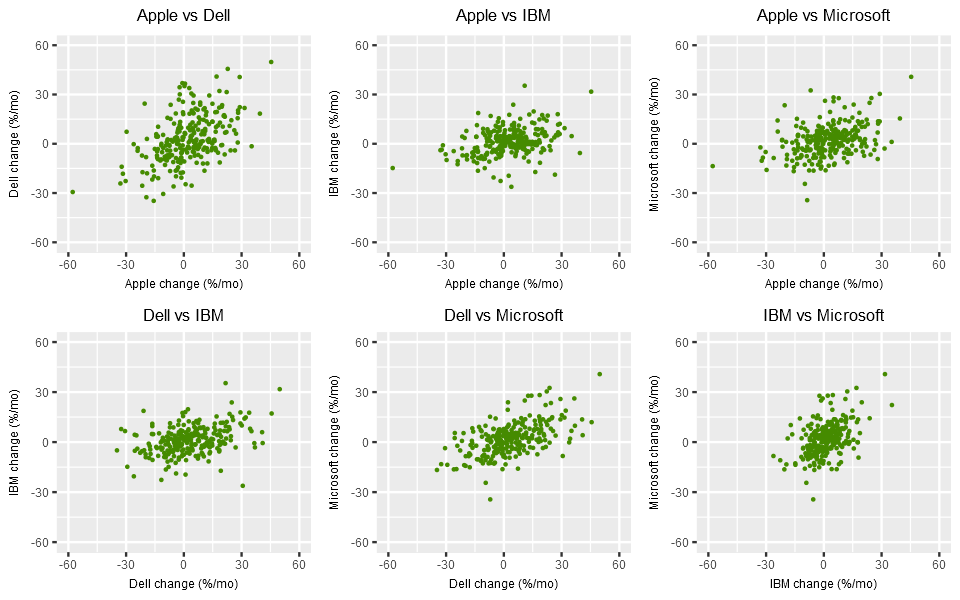

In [97]:
options(repr.plot.width=8, repr.plot.height=5)

c.apple.dell = ggplot(data) +
               geom_point(aes(x=Apple.Return*100, y=Dell.Return*100)) +
               xlim(-60,60) + ylim(-60,60) +
               ggtitle("Apple vs Dell") + xlab("Apple change (%/mo)") + ylab("Dell change (%/mo)")

c.apple.ibm = ggplot(data) +
              geom_point(aes(x=Apple.Return*100, y=IBM.Return*100)) +
              xlim(-60,60) + ylim(-60,60) +
              ggtitle("Apple vs IBM") + xlab("Apple change (%/mo)") + ylab("IBM change (%/mo)")

c.apple.microsoft = ggplot(data) +
                    geom_point(aes(x=Apple.Return*100, y=Microsoft.Return*100)) +
                    xlim(-60,60) + ylim(-60,60) +
                    ggtitle("Apple vs Microsoft") + xlab("Apple change (%/mo)") + ylab("Microsoft change (%/mo)")

c.dell.ibm = ggplot(data) +
             geom_point(aes(x=Dell.Return*100, y=IBM.Return*100)) +
             xlim(-60,60) + ylim(-60,60) +
             ggtitle("Dell vs IBM") + xlab("Dell change (%/mo)") + ylab("IBM change (%/mo)")

c.dell.microsoft = ggplot(data) +
                   geom_point(aes(x=Dell.Return*100, y=Microsoft.Return*100)) +
                   xlim(-60,60) + ylim(-60,60) +
                   ggtitle("Dell vs Microsoft") + xlab("Dell change (%/mo)") + ylab("Microsoft change (%/mo)")

c.ibm.microsoft = ggplot(data) +
                  geom_point(aes(x=IBM.Return*100, y=Microsoft.Return*100)) +
                  xlim(-60,60) + ylim(-60,60) +
                  ggtitle("IBM vs Microsoft") + xlab("IBM change (%/mo)") + ylab("Microsoft change (%/mo)")

grid.arrange(c.apple.dell, c.apple.ibm, c.apple.microsoft,
             c.dell.ibm, c.dell.microsoft, c.ibm.microsoft,
             nrow=2, ncol=3)

To present several visualizations in a grid layout, we first create the individual visualizations and assign each a name.  We use the `xlim` and `ylim` functions to ensure that all the visualization scales match.

Then we use the `grid.arrange` function to specify where the individual visualizations fit in the grid.  The first several parameters are the individual visualizations, in the order in which we want them to be presented.  The `nrow` parameter is the number of rows in the grid.  The `ncol` parameter is the number of columns in the grid.  Note, the `nrow` and `ncol` parameters are not related to any of our table's rows and columns.

<br>
** (j) Use your creative genius to show a variety of perspectives on the 5 returns. **

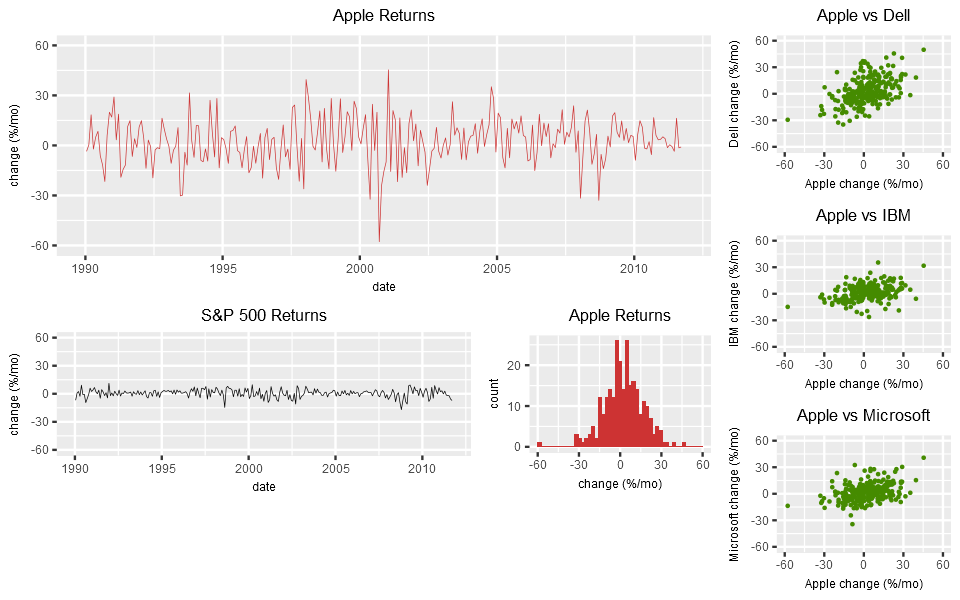

In [98]:
options(repr.plot.width=8, repr.plot.height=5)

h.apple = ggplot(data) +
          geom_histogram(aes(x=Apple.Return*100), bins=50, fill=PALETTE[2], na.rm=TRUE) +
          xlim(-60,60) +
          ggtitle("Apple Returns") + xlab("change (%/mo)")

p.apple = ggplot(data) +
          geom_line(aes(x=Date, y=Apple.Return*100), color=PALETTE[2]) +
          ylim(-60,60) +
          ggtitle("Apple Returns") + xlab("date") + ylab("change (%/mo)")

p.sp500 = ggplot(data) +
          geom_line(aes(x=Date, y=SP.500.Return*100), color="black") +
          ylim(-60,60) +
          ggtitle("S&P 500 Returns") + xlab("date") + ylab("change (%/mo)")
 
grid.arrange(p.apple, c.apple.dell, c.apple.ibm, c.apple.microsoft, p.sp500, h.apple, layout_matrix=rbind(c(1,  1,  1,  2),
                                                                                                          c(1,  1,  1,  2),
                                                                                                          c(1,  1,  1,  3),
                                                                                                          c(5,  5,  6,  3),
                                                                                                          c(5,  5,  6,  4),
                                                                                                          c(NA, NA, NA, 4)))

To present several visualizations in an arbitrary layout, we create the individual visualizations, assign each a name, and use the `grid.arrange` function to specify where the individual visualizations fit according to an arbitrary visualization layout.  The first several parameters are the individual visualizations.  The `layout_matrix` parameter is the  visualization layout.  We use the `rbind` and `c` functions to specify it.  Each vector (constructed by the `c` function) represents a row in the visualization layout.  The vector's values correspond to the order that individual visualizations are provided as parameters.  In this case, `p.apple` is an Apple returns lineplot visualization, provided as parameter 1, to be presented across the first 3 rows and first 3 columns of the overall visualization.  `c.apple.dell` is an Apple vs. Dell correlation scatterplot visualization, provided as parameter 2, to be presented across the first 2 rows and last column of the overall visualization.  The other individual visualizations are handled similarly.  Parts of the visualization layout that present no individual layout are indicated by `NA`.

<br>
** (k) Show the correlations between the 5 returns as a heat map. **

In [99]:
m = cor(data[, c(2:5,7)])
m

Apple.Return Dell.Return IBM.Return Microsoft.Return
Apple.Return     1.0000000    0.4889076   0.3477979  0.3727310       
Dell.Return      0.4889076    1.0000000   0.3696172  0.5602641       
IBM.Return       0.3477979    0.3696172   1.0000000  0.4629375       
Microsoft.Return 0.3727310    0.5602641   0.4629375  1.0000000       
SP.500.Return    0.4134858    0.4931103   0.5391675  0.5816254       
                 SP.500.Return
Apple.Return     0.4134858    
Dell.Return      0.4931103    
IBM.Return       0.5391675    
Microsoft.Return 0.5816254    
SP.500.Return    1.0000000

In [100]:
m.long = melt(m)
head(m.long)

Var1             Var2         value    
1 Apple.Return     Apple.Return 1.0000000
2 Dell.Return      Apple.Return 0.4889076
3 IBM.Return       Apple.Return 0.3477979
4 Microsoft.Return Apple.Return 0.3727310
5 SP.500.Return    Apple.Return 0.4134858
6 Apple.Return     Dell.Return  0.4889076

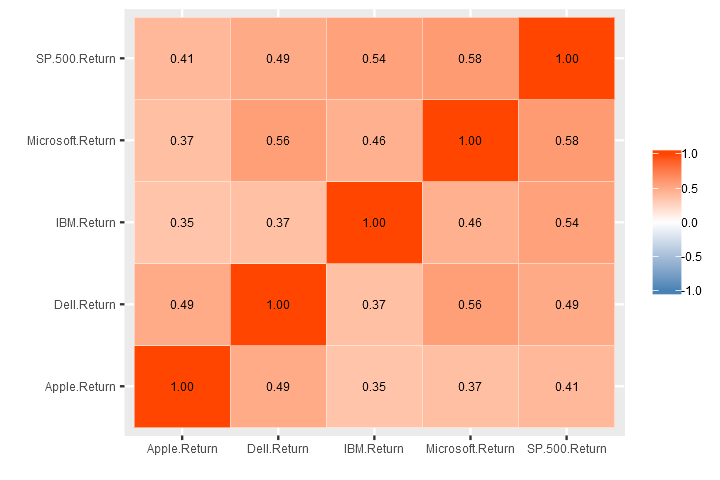

In [101]:
options(repr.plot.width=6, repr.plot.height=4)

ggplot(m.long) +
geom_tile(aes(x=Var1, y=Var2, fill=value), color="white") +
geom_text(aes(x=Var1, y=Var2, label=sprintf("%0.2f", value)), size=2.5) +
scale_fill_gradient2(low="steelblue", mid="white", high="orangered", limits=c(-1,1)) +
xlab("") + ylab("")

To visualize all returns correlations as a heatmap, we use the `cor` function to compute the correlations, convert to "long" form, and then use the `geom_tile` and related functions.

`geom_tile` creates a layer of tiles. The 1st parameter is the tile locations and their colors.  We use the `aes` function to specify the tile locations and their colors.  Note, the `fill` parameter of the `aes` function takes `m.long`'s `value` column of values, which are the original correlation values, which also serve as the tile colors per a color scale (yet to be specified).  The `color` parameter is the tiles' edge color.

`geom_text` creates a layer of text labels for the tiles.  The 1st parameter is the text locations and the texts themselves.  We use the `aes` function to specify the text locations and the texts themselves.  Note, the `label` parameter of the `aes` function takes `m.long`'s `value` column of values, which are the original correlation values, formatted to 2 decimal places.  The `size` parameter is the texts' size.<br>
<br>
`scale_fill_gradient2` creates a layer specifying the color scale.

<br>
** (l) Show the distributions of the 5 returns and the correlations between them. **

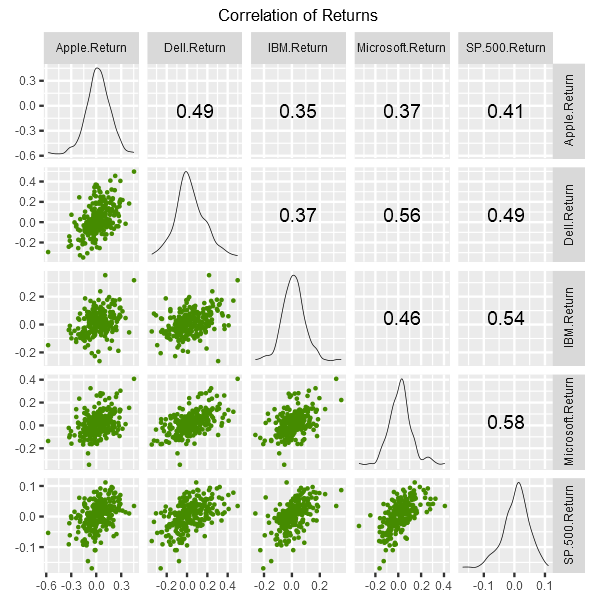

In [102]:
options(repr.plot.width=5, repr.plot.height=5)

ggscatmat(data[,c(2:5,7)]) +
ggtitle("Correlation of Returns")

To visualize all returns correlations as scatterplots (and kernel density estimate plots) in a grid layout, we use the `ggscatmat` function.  Note, `ggplot` is not needed because `ggscatmat` initializes the visualization itself.

<br>
### Data Visualization Accessories
___

** (a) Show a video. **

In [103]:
 video("video zipline.mp4", "mp4")

<video controls src="data:mp4;base64,AAAAGGZ0eXBtcDQyAAAAAG1wNDFpc29tAAAAJ3V1aWRcpwj7Mo5CBahhZQ7KCpWWAAAACzYuMi4wOTIwMC4wAFTGC21kYXQAAAAAAAAAEAAAAAIJEAAAADMGBS8C+GFQ/HBBcrcySPOnKj00TWljcm9zb2Z0IEguMjY0IEVuY29kZXIgVjEuNS4zAIAAAADuBgXqy7ITkphzQ9qopsdCmDVs9XNyYzozIGg6MjQwIHc6NDI2IGZwczoyOS45NzAgcGY6NjYgbHZsOjYgYjowIGJxcDozIGdvcDo5MCBpZHI6OTAgc2xjOjEgY21wOjAgcmM6MSBxcDoyNiByYXRlOjE1MDAwMDAgcGVhazowIGJ1ZmY6NTYyNTAwIHJlZjoyIHNyY2g6MzIgYXNyY2g6MSBzdWJwOjEgcGFyOjYgMyAzIHJuZDowIGNhYmFjOjAgbHA6MiBjdG50OjAgYXVkOjEgbGF0OjAgd3JrOjggdnVpOjEgbHlyOjEgPDwAgAAAHFFliIBL///w9FAAECP3it/w4eFfg0E1LmOubxPz4kcQEJWaEQwxDCfYP3j/v83qvXxf//3rXrVdV79//qbPVqqqqqqqo7u4Bd5SkJamzkTw2VZsqpsV2TPbvu5u8nverRsl2VGyXZLsV2S7Jdmfdzd3N+97Vdjsl2Ox2SfyZk3Vcvj4xV3N3c77/U/jsmXY7NdV16O7vjZh5W1qa470f/l8GTWNpjc7tdzDZyGXFoY7gCPKRq6AHAK7DNVG6gtWqf7uiiBE6JXK+bFwlpw1WOCAfXJ/dONARGnwc1x3add6bicOoUCICOs1ZAfTWtcGA84nNZrMYdzu4NXgp+3RbfREujjSjrf/Mr1Z+5+nAqy28ONam6yJQ8QBqcmzKKhD1xM19WORqgbz1223QRyuv/u+AkgOVKkwAL4kflchLuZVxaZ9g5Fvr9SfC19WwfI/v+xRgwOhikSHA+T39QNHYfiJ613ytwnJJhKFd/vbV58ltQzS8DBwsBdInvp/MxdIMSig+eefza9T8zzPNeENhGFVMRlT84KYfC/09+5Sc4/tatNarA1WpsKhFLb6eL8Q/B83q11X+cdxVw3D1axdrWqrWrG+LiHwDl2trWtaxgGH/jcByEYADpmPvrxEFECHiuK4pxTk776xWuv8K/gFn1m8683Xy99//0I2vqqqvb//9PqrXqqmzqVRIHiXEceVQZmQkkCmdZfJiubSuLBJgm9vXj/DgREF16+FFZSayJm2ltGK7uMqaFTOiqOgxKjPJlWuCdCDQQ+/9DlZMG/YGCGvRxSMuJMVoVxzhhTzEycnKb0Byi6q8kYMe6Tn+duECznF5aRHt/6kLnaGW1LdG5sIayrpVMngUe2P8xmnXCKSvACF5WIEiQKlM7hMox5uzWEeEHNSfc3DvK4iT1DHvHBL3XOiRccFma4G8vmRqcgmVH9r6GKqLOzTcivelv3GYjK3pnIjDDmimgh2hDcuvR5Xa2ErdMzYvAINc//fyEmsRKWvvwy4Nj9auZBijKBeNAsU/JT8G1KscOLCXbHQKrEiltsXr9ChBQdIaE65qK6lIc+L6w2np1YzpUTD/iSwklwMLEB6O22f8n0J5jIiu+ht3N2pMnBXCNndsXnAADjhi8bN44xbB/665z4caqkga164tjc3+38vqeEBhrVa1gCgNxVirxbFv/yTvSrXr4Xqq8qz//9hvyL02lOdzfl9LS0tddf4Yfja19fN6/eWRPt8jqvrr1ty/tylTqta161yuJOCSXeJUuVEkhf5/+D+kkCmqqvB779i/tuVa4LT5OqIDlDWfxxshqN7TFhDC5ff98LkB7CzVRx4xp2tUSFQYCnUzheyKUQMOPYx7k+DsQwZ2cWQpPiSg3YHSr3XFbtJK1PrjymnfOCPdW1leYaqB2vzX/2AyBnJSKOdT9ehOuCS40WuEwg72X+OiFaNr2EqkSvC4RAiKs07VaDE3fF1oX13Isr1yUGDIKzhBOpuViyY3EDxrlGJKp+36fMq3VQJ7k9a2iuexrE0f1lVVYqaWRR5gVRKkWunznKsEcUzKRM3uZvNzek+D1DLKvxIasUJdk0YmZ2o+QzPkyJspu7sQi/wwLfvr3N+BhMQHo5+fv8nTZ+2WX4kH2vXgLbg//r1A5WGtcnTZ5+fv4VJBC2sNv//dzkXuUssgjqyVV9oYp/QnkT8EI7YNRLNi7Nd3y7MXTl8ikwvV0pa2PKk5DHU2BiyoAWvnDInpI+BL1HuoN/b6cb/eX4bs6CmCips4WGcWoPxqxfvT11111xT2rW95SQnVWctik0gtYU9esi332+1r1XXrV5VBu4S5tfCRbFaWEgIdb4ZSkRexFXL5sUbR9agaSH0CR4kBhnaIL26o69fX8yYe3BCZVuwkVYvVBa7bfqvJ5B3Y4hXqpWpxxg1YPv4zP5tYXdlNH9E6mOXurk7WqowbdKjcZG3VE1oXqeckd7rYi+NR7sgOBdBoQRrG1UpMiKRPIiteQZ/Vxg07naYpZBwZubMUcg5oobsrV24czczubqaKf8rk7Oxk2t/KcL0y3H0Zsjsr5dTSsOC8d3f96pIuiRvVvb8dkNWNSThNsiU+ld63KXd3QMYx//l5XeCdof9l/jRiSOIzFW0ytjIOjCNHDpa+/Y3ZRE8XgYTEB5HPz898niP/L/L5i8X30HdzsO//JGcAv11wQUC1P/2f4lQEKrVcznJ5FlL3S8TxfMkm92gvUEMf/L73yKyxeJ4muU2TJuvx3b3kTu+W7rmzgx8/AotbYib4CPfAbHsO+2l78OPKRau307M7+pn8gKZoAo814Voe/uA/hZw+pn/2Xv/enrrrrr4YR+Hb83XrzMdRLk3pXUuMrANm/yJks2WEmBuwx616ykQkVmK1mIte0oHka8Fr5MHSCPxbAbDfkBY/4sDuxEKqZFUhtNwz74g3xZI8UyjvVaB1wBkGo+851agkXdOzgad2x1se739fJw3msAlKkTEzqxbm/6BBS90b8+kU1k49q0JC6DEz2o4Zv3vS97usnFRbZrIaloxh1Abd1r7YMnVP3gTFi9cYC1VYef6hG170hVguXWNb2ZcaPRrXSnnDCLX2k2brCLkm61LC6Jes6g15qdGvKTKQrFXwkLLcKs+aDEaJWlFcARO4r/knxePZQFzuaW01hOUn2PX+2aXv/Ut2gIkCGCXT1841kM4TlYOGxySAdHo/NGymd8zZTY85WvWz3a0REybHyYzXwAvxgvv4InIy5tFGLkmtk18KxNjSTwdggOxiBkyA9c/P3+sn5fLlyDamjcZmgP9UombF9Yf67JLjGBVgSiydNnn7v/+MolImI6rqsT9SbIicilIvci6m6rOuUywgdyVcEDvJ+7mcRKRbQ8peLuxdmF6Zvk4v7yDLK998/YUC+9hVGoxsAnZ/x6vgHAR3/ByNTb/kBFBJ0vLsBafiiL///5ffv3tw//2F7t++VPXXXXX+QfgBWvN16161eUkMMicFaQK4GPjyb5S+wppfW1CbL/YjL4UFeHB6NkHxbC8gPY/l7X3K+RXWySRyvaEr6NOaE9k339XC1l1qQq6chvLkNzS4bOcztLipNf8owQmwODDRqGduW4AfRb+vrvJIeS4AY98U2frfv8yEo+pusWWyqTwiqwL4AFsnfpP4L8B56fAj2nuf0uCUYb/m3D6mvf3i7ZjQiAU7h6xqfkEe2q3H/mHo0iR7uyF9RbKyXpztlqp/vfT2NZ2/gid0Z+fYqSA8nA1Io0IxkrHO5bzX2WEJI/uFdjaKwY0sow4317wIYq2Tu+tAOFYaXZE5gbjWDOx1sA4utXk2WF9RRXm+rbLWSFAoeRrEXchyKBN94qwiBC9VQBq8lvgl1q3qVsggNg6xbCrF3iBOReWn3vyAQNbA9RnaP3Jeh+CfgZZAI8/453+PeeT8CNq3pSPg89IhtO8u2aAgDv2qnL

To output a video, we use the `video` function defined earlier.  The 1st parameter is the filename of the video.  The 2nd parameter is the video format (i.e., its mimetype).  (This function is not yet supported in the Chrome browser.)

<br>
** (b) Show a youtube video. **

In [104]:
youtube("t-WyreE9ZkI", 425, 250)

To access and output a YouTube video, we use the `youtube` function defined earlier.  The 1st parameter is the YouTube video ID#.  The 2nd parameter is the display width.  The 3rd parameter is the display height.

<br>
### Further Reading
___
* zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/

$\tiny \text{Copyright (c) Berkeley Data Analytics Group, LLC}$